# PROJECT TITTLE: Cancer Detection (Exploratory Data Analysis)

# Objective:
a. What percentage of tumors are malignant vs. benign?

b. Which features are most different between malignant and benign tumors?

c. Which features are most correlated with the diagnosis (malignant/benign)?

d. Are there redundant features with extremely high correlation?

e. How does radius_mean relate to malignancy?

f. Which ‘_mean’, ‘_se’, or ‘_worst’ feature groups are more predictive?

g. What is the relationship between tumor size (area_mean) and complexity (concavity_mean, compactness_mean)?

h. Are there outliers in key features like area_mean, radius_worst, or concavity_mean?

i. Can we cluster benign and malignant tumors based on top features?

j. How much variance is explained by each feature group (PCA analysis)?


# 1. Importing all the necessary librabries

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# 2. Load and read the Dataset

In [133]:
data= pd.read_csv(r"D:\Programming\Project\Python for EDA\Class related\Cancer\CancerDataset.csv")

In [134]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# 3. Data Inspection

In [135]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [136]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [137]:
data.shape

(569, 33)

In [138]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [139]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [141]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# 4. Data Cleaning and Handling

### 4.1 Checking for missing values

In [142]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [143]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### 4.2 Checking for duplicate values

In [144]:
data.duplicated().any()

np.False_

### 4.3 Fixing missing and duplicated values

#### 4.3.1 Fixing the column "Unnamed: 32"

In [145]:
data.drop("Unnamed: 32", axis=1, inplace=True)

# 5. Exploratory Data Analysis

### 5.1 Distinguishing Between Categorical and Continuous Variables

In [146]:
categorical_col=[]
continuous_col=[]
for col in data.columns:
    if data[col].nunique() <=10:
        categorical_col.append(col)
    else:
        continuous_col.append(col)
print('Categorical columns=', categorical_col)
print('Continuous columns=', continuous_col)

Categorical columns= ['diagnosis']
Continuous columns= ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### 5.2 What percentage of tumors are malignant vs. benign?

In [147]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [148]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [149]:
data['diagnosis'].value_counts(normalize=True)*100

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

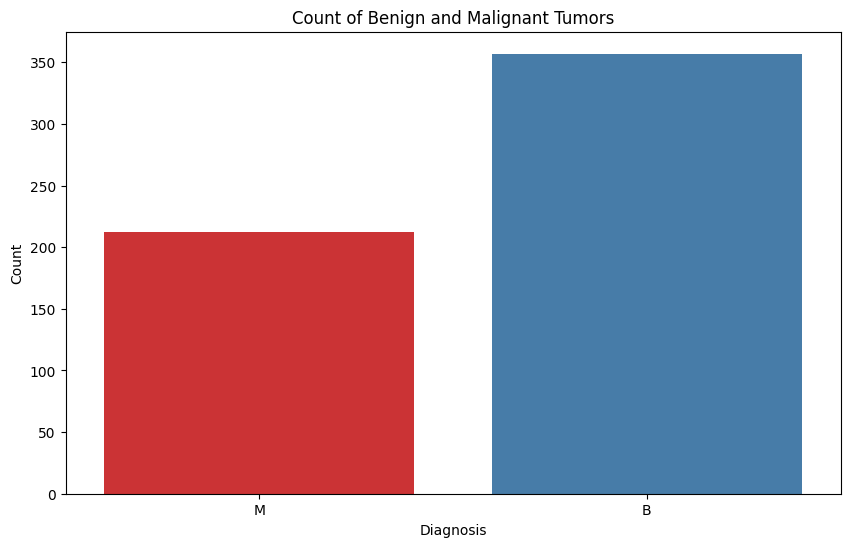

In [150]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='diagnosis', hue='diagnosis', palette='Set1')
plt.title('Count of Benign and Malignant Tumors')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

Insights:
* B represents benign and M represents Malignant
* The percentage of benign is 62.74% while that of malignant is 37.26%

### 5.3 Which features are most different between malignant and benign tumors?

In [151]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)


Top 10 differentiating features between malignant and benign tumors:
                feature       p_value  mean_difference
0  concave points_worst  1.061454e-96         0.107793
1       perimeter_worst  1.032730e-72        54.364392
2   concave points_mean  3.127316e-71         0.062273
3          radius_worst  3.556557e-71         7.755010
4        perimeter_mean  1.023141e-66        37.289971
5           radius_mean  1.684459e-64         5.316306
6       concavity_worst  9.852484e-59         0.284368
7        concavity_mean  3.742121e-58         0.114717
8            area_worst  4.937924e-54       863.386881
9             area_mean  3.284366e-52       515.586219


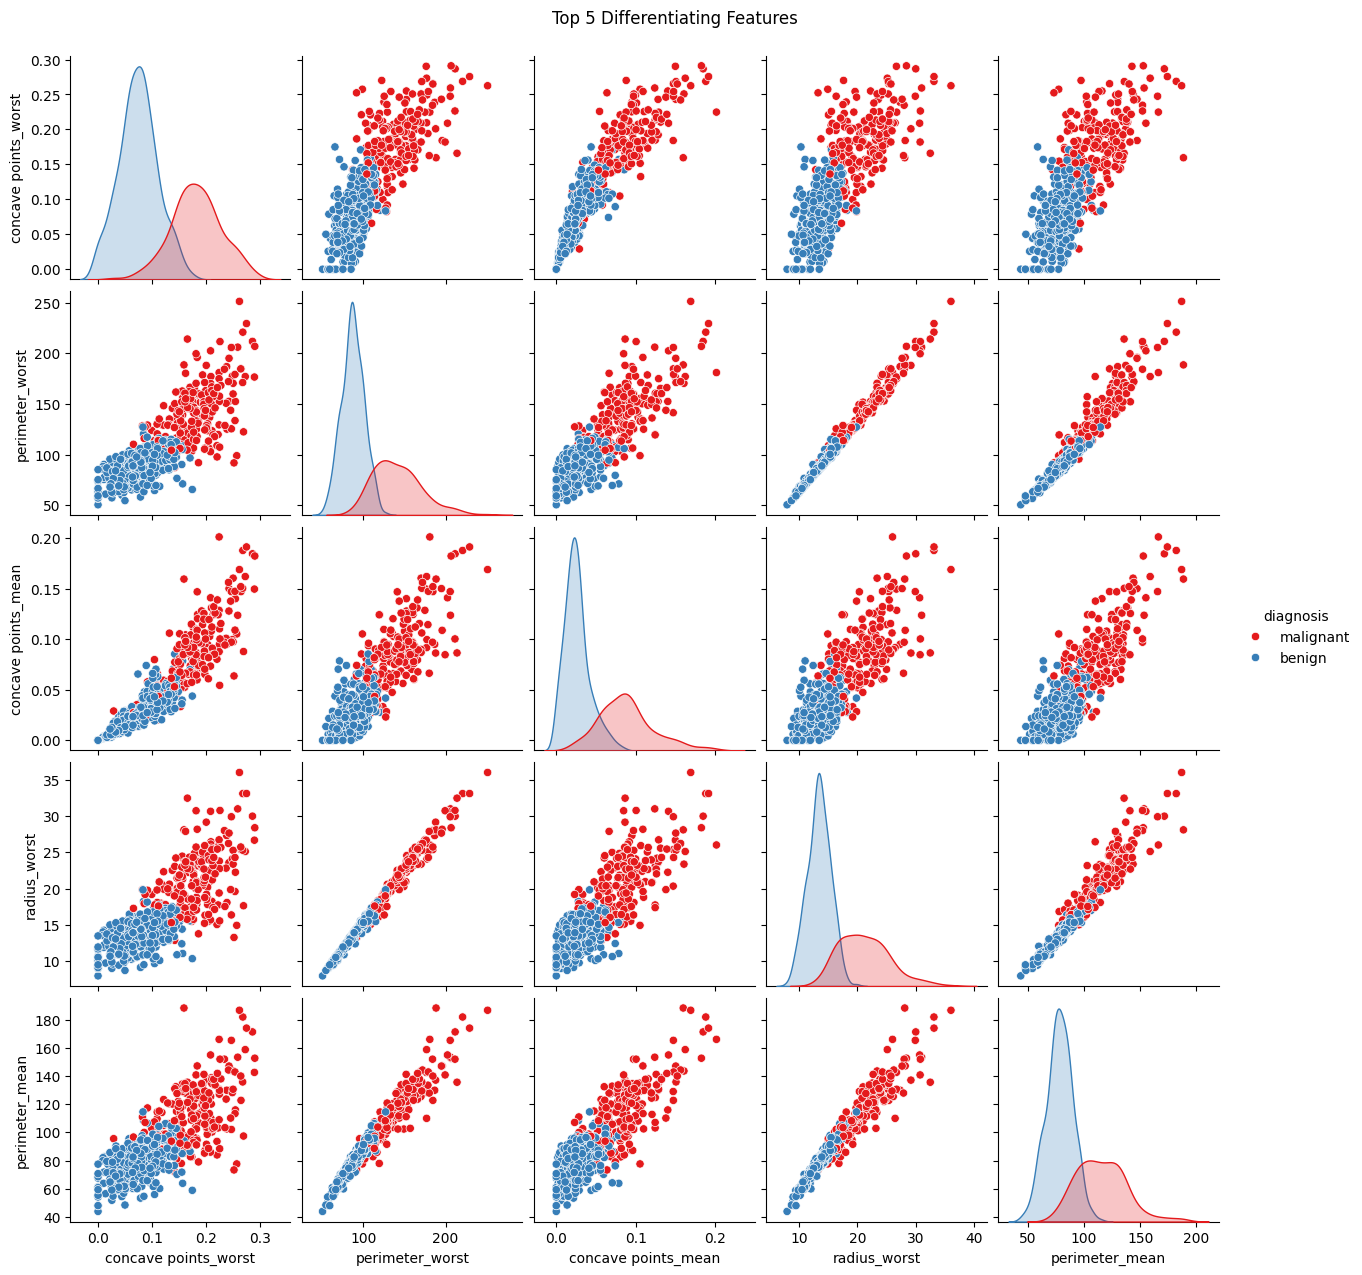

In [152]:
from scipy.stats import ttest_ind

# Map diagnosis to readable labels if needed
data['diagnosis'] = data['diagnosis'].map({'M': 'malignant', 'B': 'benign'})

# Separate into two groups
malignant = data[data['diagnosis'] == 'malignant']
benign = data[data['diagnosis'] == 'benign']

# Exclude non-numeric or identifier columns
numeric_features = data.select_dtypes(include='number').columns.tolist()

# Perform t-test for each numeric feature
ttest_results = []
for feature in numeric_features:
    stat, pval = ttest_ind(malignant[feature], benign[feature], equal_var=False)
    mean_diff = abs(malignant[feature].mean() - benign[feature].mean())
    ttest_results.append((feature, pval, mean_diff))

# Create a DataFrame for results
ttest_df = pd.DataFrame(ttest_results, columns=['feature', 'p_value', 'mean_difference'])

# Sort by significance
ttest_df_sorted = ttest_df.sort_values(by=['p_value', 'mean_difference'], ascending=[True, False])

# Reset the index
ttest_df_sorted = ttest_df_sorted.reset_index(drop=True)

# Show top 10 features that differ most
print("\nTop 10 differentiating features between malignant and benign tumors:")
print(ttest_df_sorted.head(10))

# Optional: Visualize top 5 features
top_features = ttest_df_sorted.head(5)['feature'].tolist()
sns.pairplot(data, vars=top_features, hue='diagnosis', palette='Set1')
plt.suptitle('Top 5 Differentiating Features', y=1.02)
plt.show()


Understanding the Plot:
* Each scatter plot in the grid compares two features against each other.
* The x-axis and y-axis of each subplot represent the two features being compared.
    * For example:
    * The plot in the second row, first column compares perimeter_worst (y-axis) vs. concave points_worst (x-axis).
    * The diagonal shows the distribution plots (KDE plots) for each individual feature, colored by diagnosis.

Interpretation:
* We can clearly see that malignant tumors (red) tend to have higher values in these features.
* Many of the scatter plots show clusters that are visually separable between benign and malignant diagnoses, which is helpful in classification.

### 5.4 Which features are most correlated with the diagnosis (malignant/benign)?

In [153]:
print(data['diagnosis'].unique())  # Should be ['malignant', 'benign']

['malignant' 'benign']


Top 10 positively correlated features with malignant diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis_numeric, dtype: float64

Top 10 negatively correlated features with malignant diagnosis:
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0.039769
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis_numeric, dtype: float64


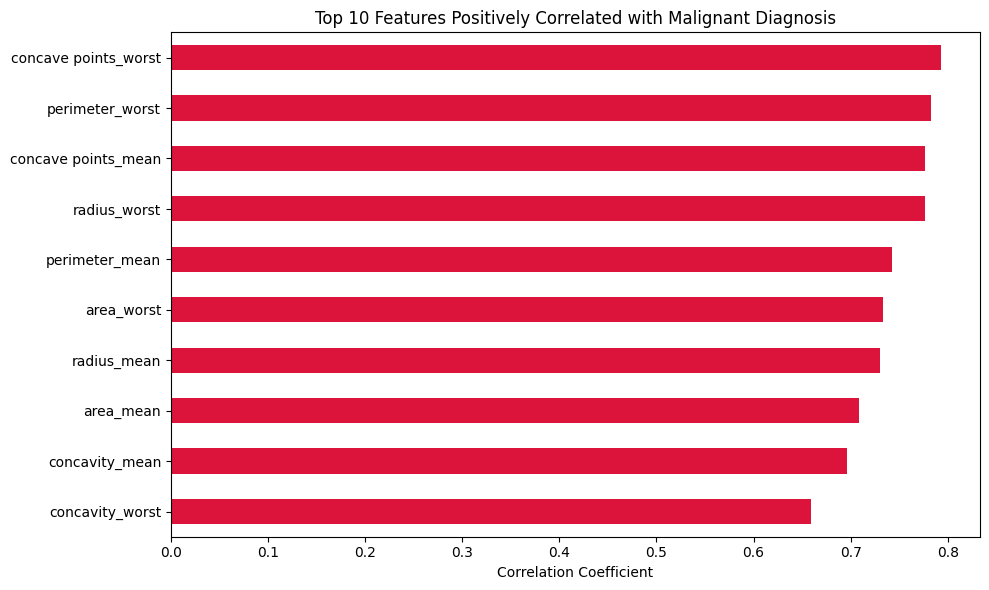

In [154]:
# Step 1: Map diagnosis to numeric values
data['diagnosis_numeric'] = data['diagnosis'].map({'malignant': 1, 'benign': 0})

# Step 2: Compute correlations with the diagnosis
correlations = data.corr(numeric_only=True)['diagnosis_numeric'].drop('diagnosis_numeric').sort_values(ascending=False)

# Step 3: Display top 10 positively and negatively correlated features
print("Top 10 positively correlated features with malignant diagnosis:")
print(correlations.head(10))

print("\nTop 10 negatively correlated features with malignant diagnosis:")
print(correlations.tail(10))

# Optional: Visualize as bar chart
plt.figure(figsize=(10, 6))
correlations.head(10).plot(kind='barh', color='crimson')
plt.title('Top 10 Features Positively Correlated with Malignant Diagnosis')
plt.gca().invert_yaxis()
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

Checking correlation
* For positive
    * 0.0 to 0.3: Weak correlation
    * 0.3 to 0.6: Moderate correlation
    * 0.6 to 0.8: Strong correlation
    * 0.8 to 1.0: Very strong/high correlation*
* For negative
    * 0 to -0.3: Weak negative correlation
    * -0.3 to -0.6: Moderate negative correlation
    * -0.6 to -0.8: Strong negative correlation
    * -0.8 to -1.0: Very strong/high negative correlation

### 5.5 Are there redundant features with extremely high correlation?

Insights:
* A redundant feature is a column (variable) in your dataset that provides the same or nearly the same information as another feature.
* Or, two features are redundant when they are so highly correlated that one can be predicted from the other with little to no loss of information.
* Highly correlated features (e.g., correlation > 0.9 or < -0.9) may be redundant, as they provide almost the same information.

In [155]:
# Set a threshold for redundancy
threshold = 0.9

# Create a mask to ignore self-correlation
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Find highly correlated pairs
high_corr = (corr_matrix.where(mask).stack().reset_index().rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'}).sort_values(by='Correlation', ascending=False))

# Filter those with correlation > threshold
redundant_pairs = high_corr[high_corr['Correlation'].abs() > threshold]
print("\nHighly correlated feature pairs (|correlation| > 0.9):")
print(redundant_pairs)



Highly correlated feature pairs (|correlation| > 0.9):
               Feature 1             Feature 2  Correlation
32           radius_mean        perimeter_mean     0.997855
442         radius_worst       perimeter_worst     0.993708
33           radius_mean             area_mean     0.987357
90        perimeter_mean             area_mean     0.986507
443         radius_worst            area_worst     0.984015
460      perimeter_worst            area_worst     0.977578
287            radius_se          perimeter_se     0.972794
109       perimeter_mean       perimeter_worst     0.970387
50           radius_mean          radius_worst     0.969539
107       perimeter_mean          radius_worst     0.969476
52           radius_mean       perimeter_worst     0.965137
134            area_mean          radius_worst     0.962746
137            area_mean            area_worst     0.959213
136            area_mean       perimeter_worst     0.959120
288            radius_se               area_

### 5.6 How does radius_mean relate to malignancy?

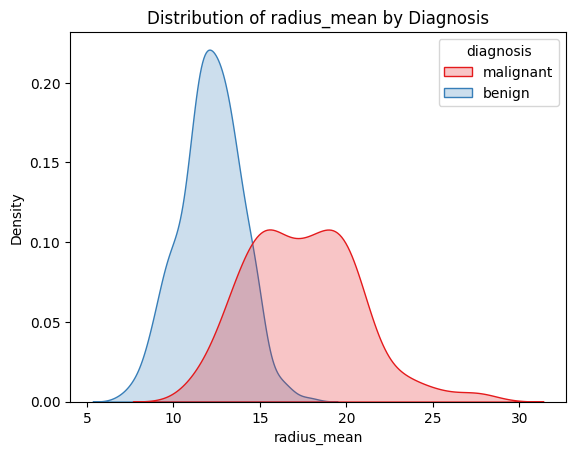

In [156]:
sns.kdeplot(data=data, x='radius_mean', hue='diagnosis', fill=True, common_norm=False, palette='Set1')
plt.title('Distribution of radius_mean by Diagnosis')
plt.show()

Insights:
* The malignant curve shifted right, meaning higher values.
* Benign tumors peak at lower radius_mean.

In [157]:
data['diagnosis_encoded'] = data['diagnosis'].map({'malignant': 1, 'benign': 0})
correlation = data['radius_mean'].corr(data['diagnosis_encoded'])
print(f"Correlation between radius_mean and malignancy: {correlation:.3f}")

Correlation between radius_mean and malignancy: 0.730


Insights:
* radius_mean is a strong predictor of malignancy. (corr = 0.730)
* Malignant tumors tend to have larger radii. (from distribuion curve)

### 5.7 Which ‘_mean’, ‘_se’, or ‘_worst’ feature groups are more predictive?

In [158]:
from scipy.stats import ttest_ind

# Step 1: Group features
mean_features = [col for col in data.columns if '_mean' in col]
se_features = [col for col in data.columns if '_se' in col]
worst_features = [col for col in data.columns if '_worst' in col]

# Step 2: Encode diagnosis
data['diagnosis_encoded'] = data['diagnosis'].map({'malignant': 1, 'benign': 0})

# Step 3: T-test function to compare group-wise predictive power
def group_stats(feature_group):
    malignant = data[data['diagnosis'] == 'malignant']
    benign = data[data['diagnosis'] == 'benign']
    results = []
    for feature in feature_group:
        stat, pval = ttest_ind(malignant[feature], benign[feature], equal_var=False)
        mean_diff = abs(malignant[feature].mean() - benign[feature].mean())
        results.append((feature, pval, mean_diff))
    return pd.DataFrame(results, columns=['Feature', 'p_value', 'mean_difference']).sort_values(by='mean_difference', ascending=False)

# Step 4: Analyze each group
mean_df = group_stats(mean_features)
se_df = group_stats(se_features)
worst_df = group_stats(worst_features)

# Step 5: Display average predictiveness
print("Average mean difference by feature group:")
print(f"MEAN group:  {mean_df['mean_difference'].mean():.4f}")
print(f"SE group:    {se_df['mean_difference'].mean():.4f}")
print(f"WORST group: {worst_df['mean_difference'].mean():.4f}")


Average mean difference by feature group:
MEAN group:  56.2154
SE group:    5.4228
WORST group: 93.1979


Insights:

| Feature Group | Avg. Mean Difference | Predictiveness          |
| ------------- | -------------------- | ----------------------- |
| _worst     | **Highest**          |  Most predictive       |
| _mean       | Moderate             |  Still very predictive |
| _se        | Lowest               |  Least predictive      |


### 5.8 What is the relationship between tumor size (area_mean) and complexity (concavity_mean, compactness_mean)?

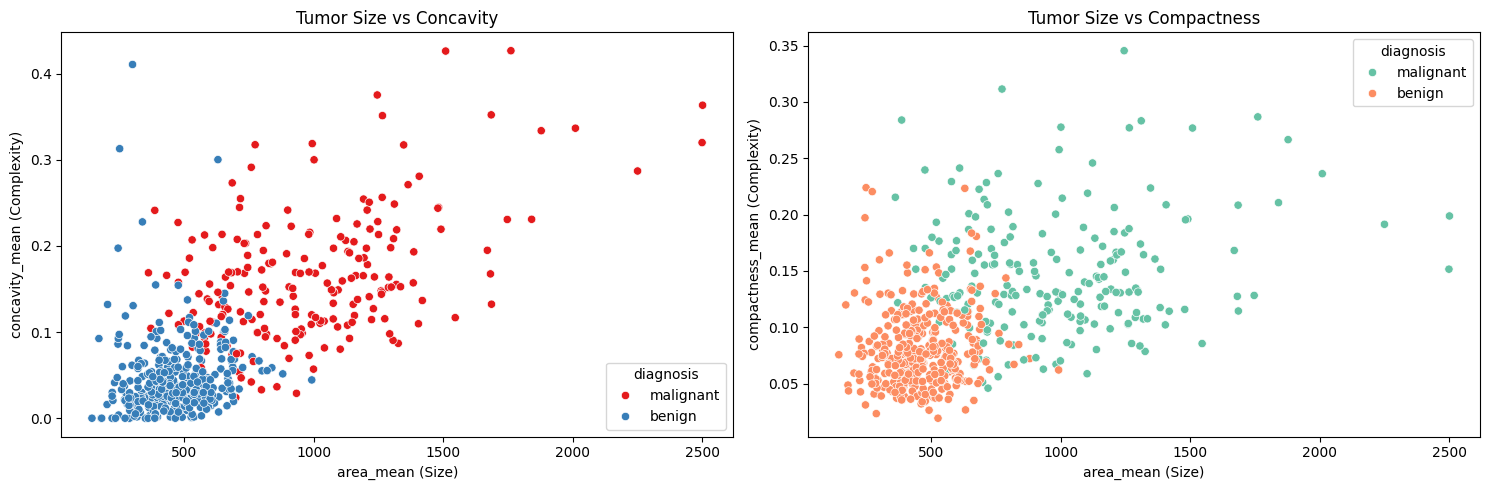

Correlation between area_mean and concavity_mean: 0.686
Correlation between area_mean and compactness_mean: 0.499


In [159]:
# Scatter plots to visualize relationships
plt.figure(figsize=(15, 5))

# area_mean vs concavity_mean
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='area_mean', y='concavity_mean', hue='diagnosis', palette='Set1')
plt.title('Tumor Size vs Concavity')
plt.xlabel('area_mean (Size)')
plt.ylabel('concavity_mean (Complexity)')

# area_mean vs compactness_mean
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='area_mean', y='compactness_mean', hue='diagnosis', palette='Set2')
plt.title('Tumor Size vs Compactness')
plt.xlabel('area_mean (Size)')
plt.ylabel('compactness_mean (Complexity)')

plt.tight_layout()
plt.show()

# Correlation values
corr_concavity = data['area_mean'].corr(data['concavity_mean'])
corr_compactness = data['area_mean'].corr(data['compactness_mean'])

print(f"Correlation between area_mean and concavity_mean: {corr_concavity:.3f}")
print(f"Correlation between area_mean and compactness_mean: {corr_compactness:.3f}")

Insights:
* Strong positive correlation: larger tumors --> more concave
* Moderate positive correlation: larger tumors --> more compact
* Larger tumors (higher area_mean) tend to be more complex in shape:
    * They often have greater **concavity (irregular borders)**.
    * They are **more compact**, indicating structural complexity.

### 5.9 Are there outliers in key features like area_mean, radius_worst, or concavity_mean?

In [160]:
Col_to_check = ['area_mean', 'radius_worst','concavity_mean']

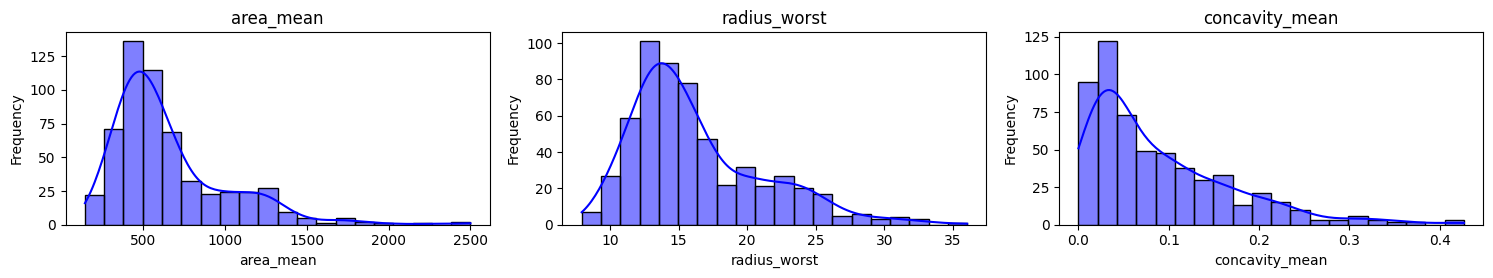

In [161]:
plt.figure(figsize=(20, 20))

rows = 8
cols = 4

for i, column in enumerate(Col_to_check, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data[column], kde=True, color='blue', bins=20)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Insights:
* Looking at the figure above, the distribution curve is not bell shaped or normally distributed

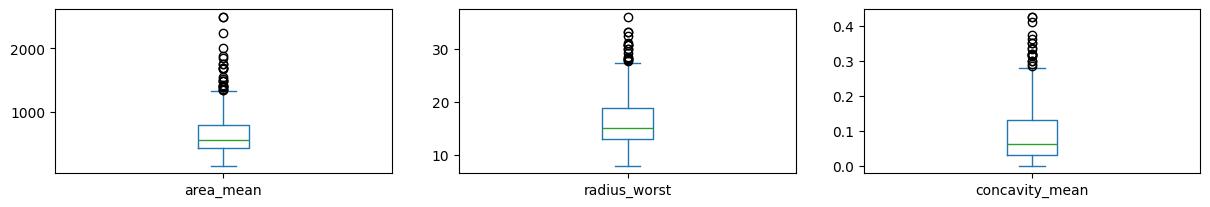

In [162]:
data[Col_to_check].plot(kind='box',subplots=True ,layout=(8, 4), figsize=(20, 20))
plt.show()

Insights:
* The above figure shows that all the features 'area_mean', 'radius_worst' and 'concavity_mean' have outliers.

### 5.10 Can we cluster benign and malignant tumors based on top features?

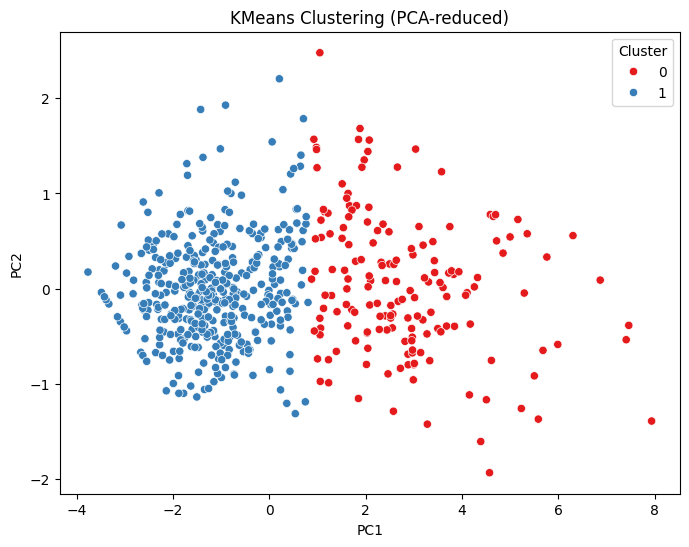

Clustering Accuracy (after adjustment): 0.92
Confusion Matrix:
[[357   0]
 [ 46 166]]


In [163]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Select top 2–5 differentiating features (from your earlier analysis)
top_features = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 
                'radius_worst', 'perimeter_mean']

X = data[top_features]
y = data['diagnosis'].map({'benign': 0, 'malignant': 1})  # Convert to binary labels

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 4: PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
plt.title("KMeans Clustering (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

# Step 6: Evaluate clustering accuracy (optional, since this is unsupervised)
# Because KMeans labels can be flipped (cluster 0 != class 0), adjust manually
adjusted_clusters = [1 if label == 0 else 0 for label in clusters]
acc = accuracy_score(y, adjusted_clusters)
print(f"Clustering Accuracy (after adjustment): {acc:.2f}")

# Optional confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y, adjusted_clusters))


Insights:
* **PCA plot**: Helps visualize whether benign and malignant tumors are separable.
* **Clustering accuracy**: If you see >90% accuracy, the selected features are very informative.
* **Confusion Matrix**: See where the model is confusing the two groups.
* Yes, tumors can be clustered fairly well using top differentiating features.
* Even without labels, clustering can almost replicate the classification, which supports how powerful those features are.

### 5.11 How much variance is explained by each feature group (PCA analysis)?

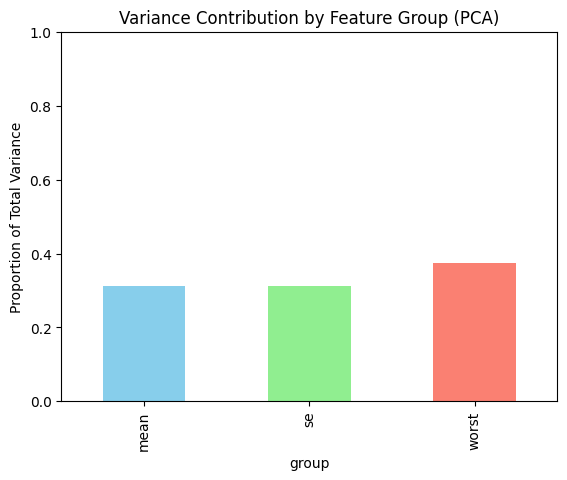

group
mean     0.3125
se       0.3125
worst    0.3750
Name: contribution, dtype: float64


In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop ID and diagnosis
X = data.drop(['id', 'diagnosis'], axis=1)

# Standardize the full feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA on all features
pca = PCA()
pca.fit(X_scaled)

# Get loadings (eigenvectors) and square them to get variance contribution
loadings = pca.components_ ** 2
feature_contributions = loadings.sum(axis=0)

# Match to columns
feature_groups = pd.Series(X.columns).apply(
    lambda x: 'mean' if x.endswith('_mean') else 'se' if x.endswith('_se') else 'worst'
)

# Map contributions to groups
contrib_df = pd.DataFrame({'feature': X.columns, 'group': feature_groups, 'contribution': feature_contributions})
group_contrib = contrib_df.groupby('group')['contribution'].sum()
group_contrib /= group_contrib.sum()  # Normalize to get proportion

# Plot
group_contrib.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Proportion of Total Variance')
plt.title('Variance Contribution by Feature Group (PCA)')
plt.ylim(0, 1)
plt.show()

# Print
print(group_contrib)


Insights:
* The above graph shows the proportion of variance, each group (_mean, _se, _worst) contributes to the entire feature set.
* Typically, _worst dominates, while _mean and _se contribute very little as they have same variance.